Ridge & Lasso Practical implementation on California house pricing.


In [3]:
# importing all neccessary libraries of python
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#importing the dataset 
from sklearn.datasets import fetch_california_housing 

In [5]:
# storing the dataset into dataframe
df=fetch_california_housing(as_frame=True)

In [6]:
# storing the dependent and independent values of dataset
x=df.data
y=df.target

In [7]:
# importing the library for splitting the data into train and test data
from sklearn.model_selection import train_test_split

# splitting the dataset into 60:40 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [12]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9012,5.8735,35.0,5.811639,1.056662,1521.0,2.329250,34.11,-118.63
2769,1.4688,8.0,10.000000,1.916667,63.0,2.625000,33.32,-115.98
1953,2.1603,28.0,4.808173,0.995460,2008.0,2.279228,38.74,-120.78
16897,4.7404,43.0,5.855140,1.009346,967.0,2.259346,37.58,-122.37
17866,3.2617,10.0,3.929142,1.051896,2032.0,2.027944,37.45,-121.92
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [14]:
# importing the library to standardize the dataset
from sklearn.preprocessing import StandardScaler

# cretaing an instance of stndardization
scaler=StandardScaler()


In [15]:
# now standardizing the tarining and testing dataset.
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Ridge Regression

In [ ]:
# importing the Ridge module for regression
from sklearn.linear_model import Ridge

# importing the GridSearchcv
from sklearn.model_selection import GridSearchCV
# GridSearchCV = a brute-force way to find the best hyperparameters using cross-validation.
# we can say the for hyperparameter tuniing we uses GridSearchCV

In [18]:
# creating an instance of Ridge
ridge_reg=Ridge()

# cretaing parameters.
parameters={'alpha':[1,2,3,4,5,10,20,30,40,50,60,70,80,90]}

In [ ]:
# here we are running our gridSearchCv on our data first we are finding the mse and then finding the best parameters for training data by fitting the mse on data
# in simple words here we are finding the best paramters to our slope
ridgeCv=GridSearchCV(ridge_reg,parameters,scoring='neg_mean_squared_error',cv=5)
ridgeCv.fit(x_train,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,5


In [20]:
print(ridgeCv.best_params_)
print(ridgeCv.best_score_)

{'alpha': 5}
-0.518418184986158


In [21]:
# predicting the values by ridge regression.
ridge_pred=ridgeCv.predict(x_test)

Showing the residual error 

<Figure size 300x400 with 0 Axes>

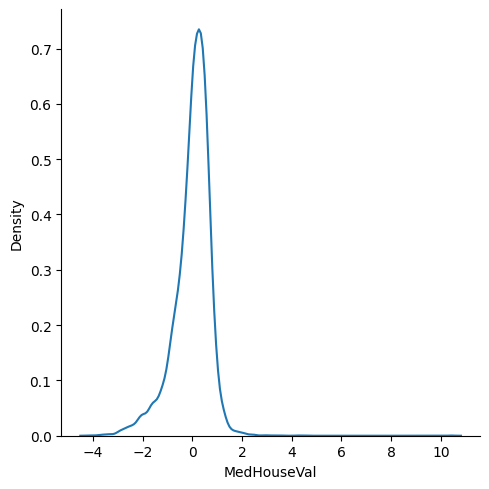

In [26]:
plt.figure(figsize=(3,4))
sns.displot(ridge_pred-y_test,kind='kde')
plt.show()

In [27]:
from sklearn.metrics import r2_score
# finding the r2_score means how much correct my model predicted the output the closer to 1 is the better
score=r2_score(y_test,ridge_pred)

score

0.5940531422721265

The same datsets with Lasso regression

In [29]:
# importing the lasso module
from sklearn.linear_model import Lasso
lasso_reg=Lasso()

In [32]:
lassoCv=GridSearchCV(lasso_reg,parameters,scoring='neg_mean_squared_error',cv=5)
lassoCv.fit(x_train,y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [33]:
print(lassoCv.best_params_)
print(lassoCv.best_score_)

{'alpha': 1}
-1.3267779125660035


In [34]:
# prediction
lasso_pred=lassoCv.predict(x_test)

Showing the residual error by lasso

<Figure size 300x400 with 0 Axes>

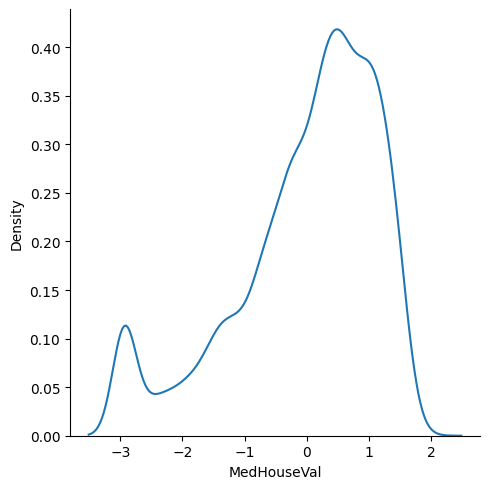

In [35]:
plt.figure(figsize=(3,4))
sns.displot(lasso_pred-y_test,kind='kde')
plt.show()

In [36]:
from sklearn.metrics import r2_score
# finding the r2_score means how much correct my model predicted the output the closer to 1 is the better
score=r2_score(y_test,lasso_pred)

score

-0.00012437768890016798